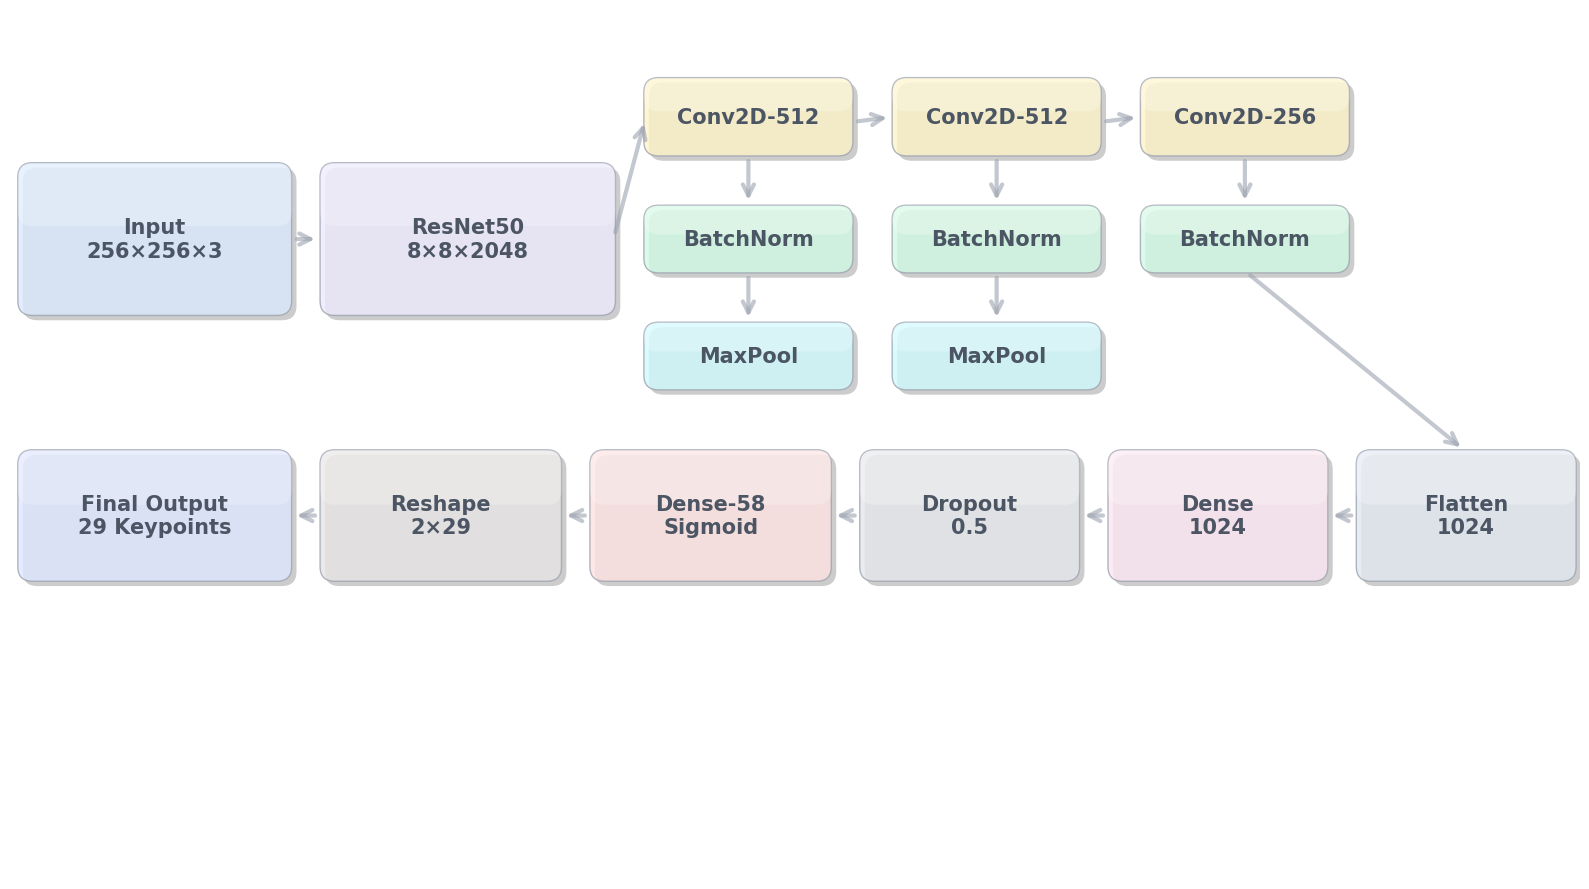

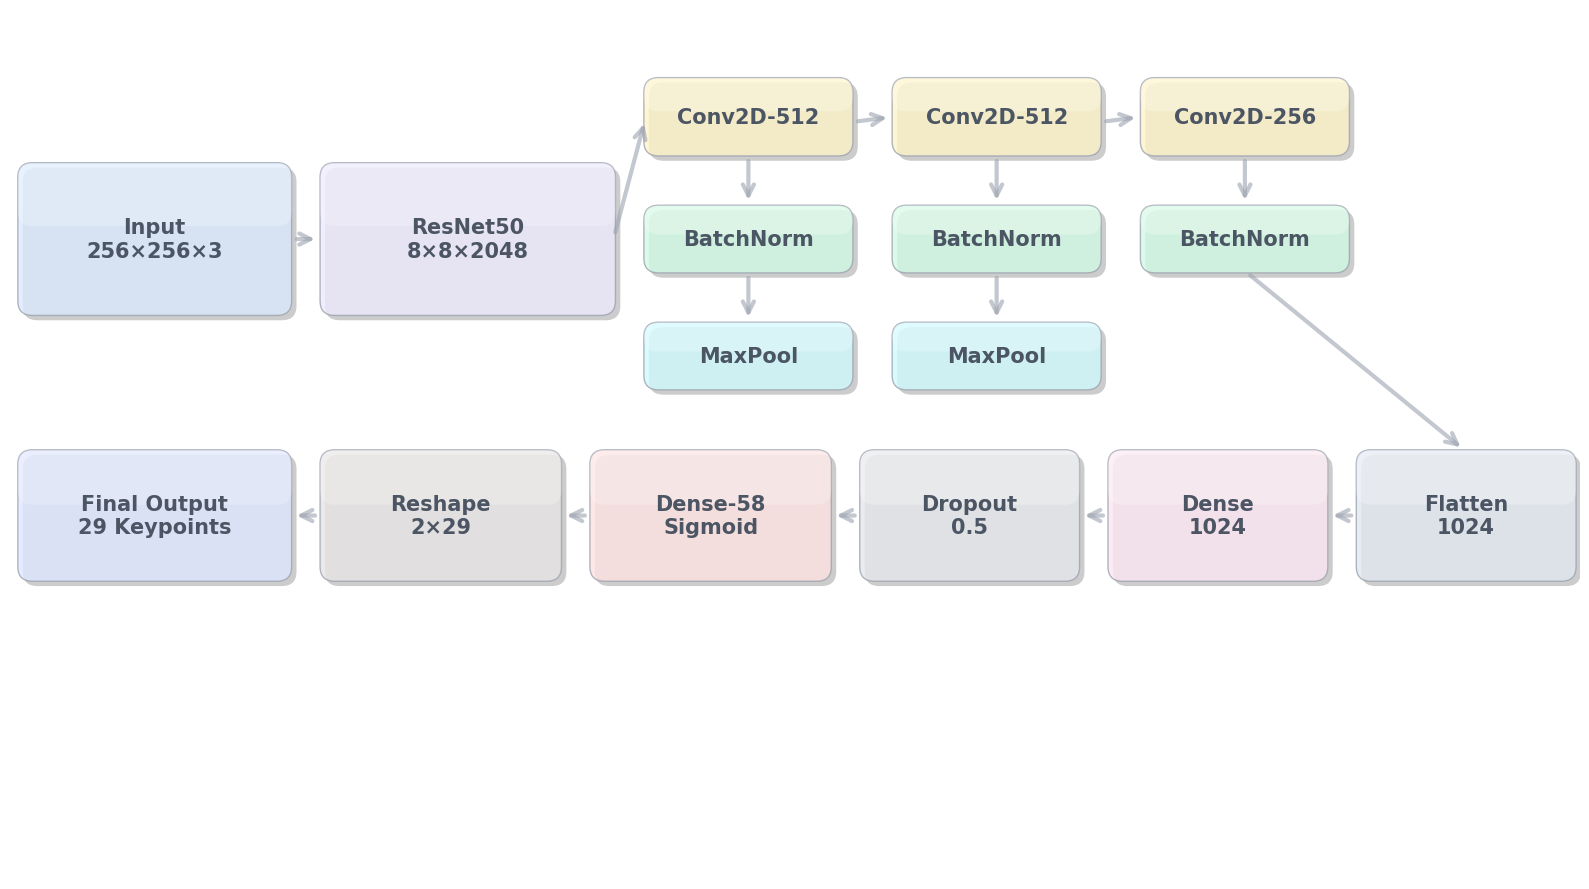

🌸 Light & Modern HPE Architecture Diagram Created!
✨ Features:
  • Soft, light gradient color schemes
  • Rounded corners and subtle shadows
  • Clean typography and spacing
  • High readability with gentle contrast
  • Professional, minimalist aesthetic

📊 Current settings:
  Scale: 1.1
  Row Distance: 2.5
  Corner Radius: 0.15
  Shadow Depth: 0.05
  Font Size: 15
  Arrow Thickness: 3

💾 Saved as:
  • hpe_architecture_light.png (300 DPI)
  • hpe_architecture_light.pdf (vector)


<Figure size 640x480 with 0 Axes>

In [71]:
from matplotlib.patches import FancyBboxPatch, ConnectionPatch
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# ============ HYPERPARAMETERS - ADJUST THESE TO TWEAK THE DIAGRAM ============
SCALE_FACTOR = 1.1          # Overall scale of the diagram (0.5 = half size, 2.0 = double size)
X_OFFSET = 0.1              # Horizontal position offset (positive = move right, negative = move left)
Y_OFFSET = -0.2             # Vertical position offset (positive = move up, negative = move down)
ROW_DISTANCE = 2.5          # Vertical distance between top and bottom rows (larger = more space)
CANVAS_WIDTH = 16           # Canvas width (maintain 16:9 ratio)
CANVAS_HEIGHT = 9           # Canvas height
BLOCK_HEIGHT_SCALE = 1.0    # Scale factor for block heights only
ARROW_THICKNESS = 3         # Arrow line thickness
FONT_SIZE = 15              # Text font size
CORNER_RADIUS = 0.15        # Corner radius for modern rounded blocks
SHADOW_OFFSET = 0.05        # Shadow offset for depth effect
# ============================================================================

# Create figure with dark background for modern look
fig, ax = plt.subplots(1, 1, figsize=(CANVAS_WIDTH, CANVAS_HEIGHT))
ax.set_xlim(0, CANVAS_WIDTH)
ax.set_ylim(0, CANVAS_HEIGHT)
ax.axis('off')
fig.patch.set_facecolor('white')  # Pure white background

# Extra light and subtle color scheme with softer gradients
colors = {
    # Input/Output layers - Extra Light Blue gradient
    'input': {'main': '#dbeafe', 'light': '#f8faff', 'dark': '#bfdbfe'},
    'final': {'main': '#e0e7ff', 'light': '#f5f6ff', 'dark': '#c7d2fe'},
    
    # Backbone - Extra Light Purple gradient  
    'resnet': {'main': '#ede9fe', 'light': '#faf9ff', 'dark': '#ddd6fe'},
    
    # Conv layers - Extra Light Orange/Amber gradient
    'conv': {'main': '#fef3c7', 'light': '#fffef5', 'dark': '#fde68a'},
    
    # Normalization - Extra Light Green gradient
    'batch_norm': {'main': '#d1fae5', 'light': '#f7fef9', 'dark': '#a7f3d0'},
    
    # Pooling - Extra Light Cyan gradient
    'pool': {'main': '#cffafe', 'light': '#f5feff', 'dark': '#a5f3fc'},
    
    # Dense layers - Extra Light Rose/Pink gradient
    'dense': {'main': '#fce7f3', 'light': '#fef9f7', 'dark': '#f9d2e4'},
    'output': {'main': '#fee2e2', 'light': '#fefafa', 'dark': '#fecaca'},
    
    # Utility layers - Extra Light Gray/Slate gradient
    'flatten': {'main': '#e2e8f0', 'light': '#fbfcfd', 'dark': '#cbd5e1'},
    'dropout': {'main': '#e5e7eb', 'light': '#fefefe', 'dark': '#d1d5db'},
    'reshape': {'main': '#e7e5e4', 'light': '#fafaf9', 'dark': '#d6d3d1'},
    
    # UI elements
    'border': '#9ca3af',
    'shadow': '#00000008',
    'arrow': '#9ca3af'
}

def create_modern_gradient_box(ax, x, y, width, height, label, color_scheme, text_color='white'):
    """Create a modern gradient box with shadow and rounded corners"""
    # Apply scaling and offset
    scaled_x = (x * SCALE_FACTOR) + X_OFFSET
    scaled_y = (y * SCALE_FACTOR) + Y_OFFSET
    scaled_width = width * SCALE_FACTOR
    scaled_height = height * SCALE_FACTOR * BLOCK_HEIGHT_SCALE
    
    # Shadow layer (slightly offset)
    shadow = FancyBboxPatch(
        (scaled_x + SHADOW_OFFSET, scaled_y - SHADOW_OFFSET), 
        scaled_width, scaled_height,
        boxstyle=f"round,pad=0.02,rounding_size={CORNER_RADIUS}",
        facecolor=colors['shadow'],
        edgecolor='none',
        alpha=0.2,
        zorder=1
    )
    ax.add_patch(shadow)
    
    # Main gradient box
    main_box = FancyBboxPatch(
        (scaled_x, scaled_y), scaled_width, scaled_height,
        boxstyle=f"round,pad=0.02,rounding_size={CORNER_RADIUS}",
        facecolor=color_scheme['main'],
        edgecolor=colors['border'],
        linewidth=1.0,
        alpha=0.8,
        zorder=2
    )
    ax.add_patch(main_box)
    
    # Highlight overlay for depth
    highlight = FancyBboxPatch(
        (scaled_x, scaled_y + scaled_height * 0.6), 
        scaled_width, scaled_height * 0.4,
        boxstyle=f"round,pad=0.02,rounding_size={CORNER_RADIUS}",
        facecolor=color_scheme['light'],
        edgecolor='none',
        alpha=0.3,
        zorder=3
    )
    ax.add_patch(highlight)
    
    # Text with better contrast for lighter colors
    text_color = '#4b5563'  # Lighter gray text for extra light backgrounds
    
    ax.text(scaled_x + scaled_width/2, scaled_y + scaled_height/2, label, 
           ha='center', va='center', fontsize=FONT_SIZE, fontweight='600', 
           color=text_color, zorder=4)

def create_modern_arrow(ax, start_x, start_y, end_x, end_y, style="->"):
    """Create a modern arrow with gradient effect"""
    # Apply scaling and offset
    scaled_start_x = (start_x * SCALE_FACTOR) + X_OFFSET
    scaled_start_y = (start_y * SCALE_FACTOR) + Y_OFFSET
    scaled_end_x = (end_x * SCALE_FACTOR) + X_OFFSET
    scaled_end_y = (end_y * SCALE_FACTOR) + Y_OFFSET
    
    arrow = ConnectionPatch(
        (scaled_start_x, scaled_start_y), (scaled_end_x, scaled_end_y), "data", "data",
        arrowstyle=style, shrinkA=5, shrinkB=5, 
        mutation_scale=20, fc=colors['arrow'], ec=colors['arrow'], 
        linewidth=ARROW_THICKNESS, alpha=0.6, zorder=5
    )
    ax.add_patch(arrow)

# Calculate row positions based on ROW_DISTANCE parameter
TOP_ROW_Y = 6.0 + (ROW_DISTANCE - 3.5) / 2
BOTTOM_ROW_Y = 2.5 - (ROW_DISTANCE - 3.5) / 2

# Define base layer positions with modern styling
# TOP ROW (Input to Conv3)
top_row_layers = [
    # Input - starts at left edge
    {'x': 0.0, 'y': TOP_ROW_Y, 'w': 2.5, 'h': 1.4, 'label': 'Input\n256×256×3', 'color': colors['input']},
    
    # ResNet50 Backbone
    {'x': 2.8, 'y': TOP_ROW_Y, 'w': 2.7, 'h': 1.4, 'label': 'ResNet50\n8×8×2048', 'color': colors['resnet']},
    
    # Conv block 1
    {'x': 5.8, 'y': TOP_ROW_Y + 1.5, 'w': 1.9, 'h': 0.7, 'label': 'Conv2D-512', 'color': colors['conv']},
    {'x': 5.8, 'y': TOP_ROW_Y + 0.4, 'w': 1.9, 'h': 0.6, 'label': 'BatchNorm', 'color': colors['batch_norm']},
    {'x': 5.8, 'y': TOP_ROW_Y - 0.7, 'w': 1.9, 'h': 0.6, 'label': 'MaxPool', 'color': colors['pool']},
    
    # Conv block 2
    {'x': 8.1, 'y': TOP_ROW_Y + 1.5, 'w': 1.9, 'h': 0.7, 'label': 'Conv2D-512', 'color': colors['conv']},
    {'x': 8.1, 'y': TOP_ROW_Y + 0.4, 'w': 1.9, 'h': 0.6, 'label': 'BatchNorm', 'color': colors['batch_norm']},
    {'x': 8.1, 'y': TOP_ROW_Y - 0.7, 'w': 1.9, 'h': 0.6, 'label': 'MaxPool', 'color': colors['pool']},
    
    # Conv block 3
    {'x': 10.4, 'y': TOP_ROW_Y + 1.5, 'w': 1.9, 'h': 0.7, 'label': 'Conv2D-256', 'color': colors['conv']},
    {'x': 10.4, 'y': TOP_ROW_Y + 0.4, 'w': 1.9, 'h': 0.6, 'label': 'BatchNorm', 'color': colors['batch_norm']},
]

# BOTTOM ROW (reverse direction) 
bottom_row_layers = [
    # Final output
    {'x': 0.0, 'y': BOTTOM_ROW_Y, 'w': 2.5, 'h': 1.2, 'label': 'Final Output\n29 Keypoints', 'color': colors['final']},
    
    # Reshape
    {'x': 2.8, 'y': BOTTOM_ROW_Y, 'w': 2.2, 'h': 1.2, 'label': 'Reshape\n2×29', 'color': colors['reshape']},
    
    # Output Dense
    {'x': 5.3, 'y': BOTTOM_ROW_Y, 'w': 2.2, 'h': 1.2, 'label': 'Dense-58\nSigmoid', 'color': colors['output']},
    
    # Dropout
    {'x': 7.8, 'y': BOTTOM_ROW_Y, 'w': 2.0, 'h': 1.2, 'label': 'Dropout\n0.5', 'color': colors['dropout']},
    
    # Dense
    {'x': 10.1, 'y': BOTTOM_ROW_Y, 'w': 2.0, 'h': 1.2, 'label': 'Dense\n1024', 'color': colors['dense']},
    
    # Flatten
    {'x': 12.4, 'y': BOTTOM_ROW_Y, 'w': 2.0, 'h': 1.2, 'label': 'Flatten\n1024', 'color': colors['flatten']},
]

# Draw all layers with modern styling
for layer in top_row_layers + bottom_row_layers:
    create_modern_gradient_box(ax, layer['x'], layer['y'], layer['w'], layer['h'], 
                              layer['label'], layer['color'])

# Define modern arrow positions
top_row_arrows = [
    (2.5, TOP_ROW_Y + 0.7, 2.8, TOP_ROW_Y + 0.7),      # Input to ResNet50
    (5.5, TOP_ROW_Y + 0.7, 5.8, TOP_ROW_Y + 1.85),     # ResNet50 to first Conv
    (6.75, TOP_ROW_Y + 1.5, 6.75, TOP_ROW_Y + 1.0),    # Conv to BatchNorm (block 1)
    (6.75, TOP_ROW_Y + 0.4, 6.75, TOP_ROW_Y - 0.1),    # BatchNorm to MaxPool (block 1)
    (7.7, TOP_ROW_Y + 1.8, 8.1, TOP_ROW_Y + 1.85),     # Block 1 to Block 2
    (9.05, TOP_ROW_Y + 1.5, 9.05, TOP_ROW_Y + 1.0),    # Conv to BatchNorm (block 2)
    (9.05, TOP_ROW_Y + 0.4, 9.05, TOP_ROW_Y - 0.1),    # BatchNorm to MaxPool (block 2)
    (10.0, TOP_ROW_Y + 1.8, 10.4, TOP_ROW_Y + 1.85),   # Block 2 to Block 3
    (11.35, TOP_ROW_Y + 1.5, 11.35, TOP_ROW_Y + 1.0),  # Conv to BatchNorm (block 3)
]

# Connection from top row to bottom row
connection_arrows = [
    (11.35, TOP_ROW_Y + 0.4, 13.4, BOTTOM_ROW_Y + 1.2),   # Conv3 BatchNorm to Flatten
]

# Bottom row arrows (reverse direction)
bottom_row_arrows = [
    (12.4, BOTTOM_ROW_Y + 0.6, 12.1, BOTTOM_ROW_Y + 0.6),    # Flatten to Dense
    (10.1, BOTTOM_ROW_Y + 0.6, 9.8, BOTTOM_ROW_Y + 0.6),     # Dense to Dropout
    (7.8, BOTTOM_ROW_Y + 0.6, 7.5, BOTTOM_ROW_Y + 0.6),      # Dropout to Output Dense
    (5.3, BOTTOM_ROW_Y + 0.6, 5.0, BOTTOM_ROW_Y + 0.6),      # Output Dense to Reshape
    (2.8, BOTTOM_ROW_Y + 0.6, 2.5, BOTTOM_ROW_Y + 0.6),      # Reshape to Final Output
]

# Draw all modern arrows
for arrow in top_row_arrows + connection_arrows + bottom_row_arrows:
    create_modern_arrow(ax, arrow[0], arrow[1], arrow[2], arrow[3])

plt.tight_layout()
plt.show()

# Save with high quality
plt.savefig('hpe_architecture_light.png', dpi=300, bbox_inches='tight', 
           facecolor='white', edgecolor='none', pad_inches=0.1)
plt.savefig('hpe_architecture_light.pdf', dpi=300, bbox_inches='tight', 
           facecolor='white', edgecolor='none', pad_inches=0.1)

print("🌸 Light & Modern HPE Architecture Diagram Created!")
print("✨ Features:")
print("  • Soft, light gradient color schemes")
print("  • Rounded corners and subtle shadows")
print("  • Clean typography and spacing")
print("  • High readability with gentle contrast")
print("  • Professional, minimalist aesthetic")
print(f"\n📊 Current settings:")
print(f"  Scale: {SCALE_FACTOR}")
print(f"  Row Distance: {ROW_DISTANCE}")
print(f"  Corner Radius: {CORNER_RADIUS}")
print(f"  Shadow Depth: {SHADOW_OFFSET}")
print(f"  Font Size: {FONT_SIZE}")
print(f"  Arrow Thickness: {ARROW_THICKNESS}")
print(f"\n💾 Saved as:")
print(f"  • hpe_architecture_light.png (300 DPI)")
print(f"  • hpe_architecture_light.pdf (vector)")